Text(0.5, 1.0, 'Number of Employer Firms')

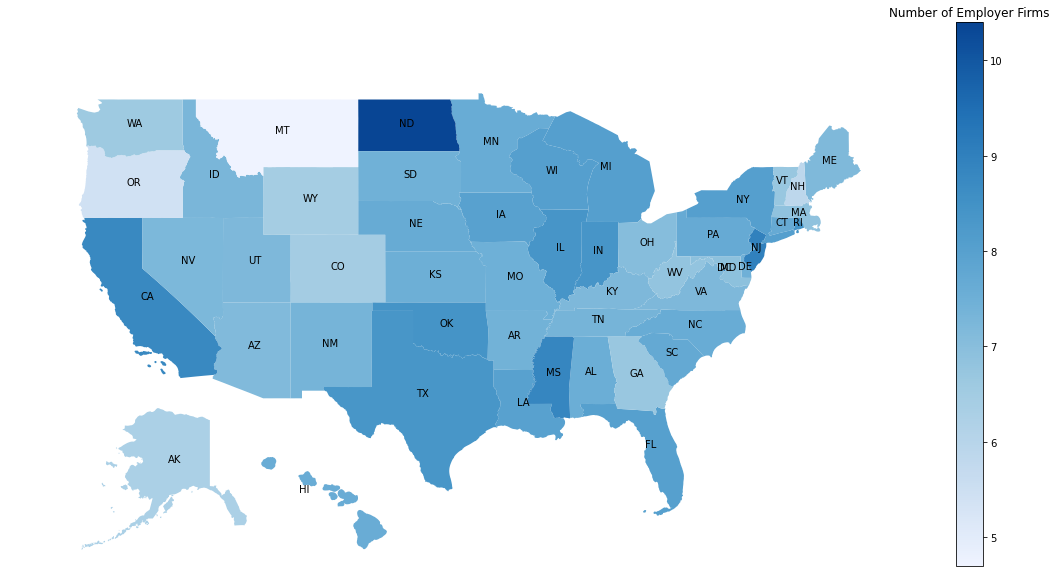

In [57]:
import geopandas 
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from palettable.colorbrewer.sequential import Blues_7
import matplotlib.colors as colors

states = geopandas.read_file(r'C:\Users\User\Desktop\Data_Cohort\Week 8 (M08)\Assessment\tl_2019_us_state\tl_2019_us_state.shp')

US_territory = ['United States Virgin Islands','Commonwealth of the Northern Mariana Islands','Guam','Puerto Rico','American Samoa']
states = states[states['NAME'].isin(US_territory)== False]

# read number of employer firms by state data
state_data = pd.read_csv('state_data.csv')
# merge with map data 
merged_data = state_data.merge(states,how='inner',on='NAME')
merged_data = merged_data[['NAME','STUSPS','FIRMPDEMP','geometry']]
data = GeoDataFrame(merged_data)


# set state code as index, exclude states that we will never display
data = data.set_index('NAME')
# create an axis with 2 insets − this defines the inset sizes
fig, continental_ax = plt.subplots(figsize=(20, 10))
alaska_ax = continental_ax.inset_axes([.08, .01, .20, .28])
hawaii_ax = continental_ax.inset_axes([.28, .01, .15, .19])

# Set bounds to fit desired areas in each plot
continental_ax.set_xlim(-130, -64)
continental_ax.set_ylim(22, 53)

alaska_ax.set_ylim(51, 72)
alaska_ax.set_xlim(-180, -127)

hawaii_ax.set_ylim(18.8, 22.5)
hawaii_ax.set_xlim(-160, -154.6)

# Plot the data per area - requires passing the same choropleth parameters to each call
# because different data is used in each call, so automatically setting bounds won’t work
vmin, vmax = data['FIRMPDEMP'].agg(['min', 'max'])
data.drop(index=['Hawaii', 'Alaska']).plot(column="FIRMPDEMP", cmap = Blues_7.mpl_colormap, ax=continental_ax, vmin=vmin, vmax=vmax)#, legend =True, labels={'FIRMPDEMP':'Number of Employer Firms'})
data.loc[['Alaska']].plot(column="FIRMPDEMP",cmap = Blues_7.mpl_colormap, ax=alaska_ax, vmin=vmin, vmax=vmax)
data.loc[['Hawaii']].plot(column="FIRMPDEMP",cmap = Blues_7.mpl_colormap, ax=hawaii_ax, vmin=vmin, vmax=vmax)
# remove ticks
for ax in [continental_ax, alaska_ax, hawaii_ax]:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.axis('off')
    merged_data.apply(lambda x: ax.annotate(text=x['STUSPS'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
    # merged_data.apply(lambda x: ax.annotate(text=x['FIRMPDEMP'], xy=x.geometry.centroid.coords[0], ha='left'), axis=1);

norm = colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap=Blues_7.mpl_colormap)
ax_cbar = fig.colorbar(cbar, ax=continental_ax)
ax_cbar.ax.set_title('Number of Employer Firms')
